In [41]:
import requests
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# i am using api to pull the data but no need to use of the API Key for this site.
url='https://api.covid19api.com/summary'
request=requests.get(url)
r_text=request.text
print(r_text)

{
  "Global": {
    "NewConfirmed": 95649,
    "TotalConfirmed": 5593728,
    "NewDeaths": 4898,
    "TotalDeaths": 372053,
    "NewRecovered": 47229,
    "TotalRecovered": 1455558
  },
  "Countries": [
    {
      "Country": "Afghanistan",
      "CountryCode": "AF",
      "Slug": "afghanistan",
      "NewConfirmed": 285,
      "TotalConfirmed": 4687,
      "NewDeaths": 2,
      "TotalDeaths": 122,
      "NewRecovered": 0,
      "TotalRecovered": 558,
      "Date": "2020-05-12T18:19:52Z"
    },
    {
      "Country": "Albania",
      "CountryCode": "AL",
      "Slug": "albania",
      "NewConfirmed": 4,
      "TotalConfirmed": 872,
      "NewDeaths": 0,
      "TotalDeaths": 31,
      "NewRecovered": 4,
      "TotalRecovered": 654,
      "Date": "2020-05-12T18:19:52Z"
    },
    {
      "Country": "Algeria",
      "CountryCode": "DZ",
      "Slug": "algeria",
      "NewConfirmed": 168,
      "TotalConfirmed": 5891,
      "NewDeaths": 5,
      "TotalDeaths": 507,
      "NewRecovered": 16

In [3]:
# converting into json format
data=json.loads(r_text)

In [4]:
d=data['Countries']

In [5]:
# checking the data type
print(type(data))

<class 'dict'>


In [74]:
# converting into dataframe using pandas library
df=pd.DataFrame(d)

In [75]:
df

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,285,4687,2,122,0,558,2020-05-12T18:19:52Z
1,Albania,AL,albania,4,872,0,31,4,654,2020-05-12T18:19:52Z
2,Algeria,DZ,algeria,168,5891,5,507,163,2841,2020-05-12T18:19:52Z
3,Andorra,AD,andorra,0,755,0,48,0,550,2020-05-12T18:19:52Z
4,Angola,AO,angola,0,45,0,2,0,13,2020-05-12T18:19:52Z
...,...,...,...,...,...,...,...,...,...,...
180,Viet Nam,VN,vietnam,0,288,0,0,8,249,2020-05-12T18:19:52Z
181,Western Sahara,EH,western-sahara,0,6,0,0,1,6,2020-05-12T18:19:52Z
182,Yemen,YE,yemen,5,56,1,9,0,1,2020-05-12T18:19:52Z
183,Zambia,ZM,zambia,0,267,0,7,0,117,2020-05-12T18:19:52Z


In [76]:
# checking the data's statistics 
df.describe()

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000
mean,517.021622,3.023637e+04,26.475676,2011.097297,255.291892,7867.881081
std,2937.890231,2.013965e+05,176.938213,12600.867054,1327.302884,26772.599481
min,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.810000e+02,0.000000,4.000000,0.000000,53.000000
50%,14.000000,1.024000e+03,0.000000,21.000000,5.000000,461.000000
75%,161.000000,8.616000e+03,5.000000,218.000000,75.000000,2840.000000
max,37237.000000,2.693509e+06,2309.000000,161307.000000,16564.000000,232733.000000


In [77]:
# checking the data's basic information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         185 non-null    object
 1   CountryCode     185 non-null    object
 2   Slug            185 non-null    object
 3   NewConfirmed    185 non-null    int64 
 4   TotalConfirmed  185 non-null    int64 
 5   NewDeaths       185 non-null    int64 
 6   TotalDeaths     185 non-null    int64 
 7   NewRecovered    185 non-null    int64 
 8   TotalRecovered  185 non-null    int64 
 9   Date            185 non-null    object
dtypes: int64(6), object(4)
memory usage: 14.6+ KB


In [78]:
# displaying the columns of the dataframe
df.columns

Index(['Country', 'CountryCode', 'Slug', 'NewConfirmed', 'TotalConfirmed',
       'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered', 'Date'],
      dtype='object')

In [79]:
# I am replacing the header to make it more redable
df.columns=['Country_Name','Country_Code','Slug','New_Cases','Total_Cases','New_Deaths_Toll','Total_Deaths_Toll',
            'Recently_recovered','Total_Recovered','Date']

In [11]:
df

,Country_Name,Country_Code,Slug,New_Cases,Total_Cases,New_Deaths_Toll,Total_Deaths_Toll,Recently_recovered,Total_Recovered,Date
0,Afghanistan,AF,afghanistan,285,4687,2,122,0,558,2020-05-12T18:19:52Z
1,Albania,AL,albania,4,872,0,31,4,654,2020-05-12T18:19:52Z
2,Algeria,DZ,algeria,168,5891,5,507,163,2841,2020-05-12T18:19:52Z
3,Andorra,AD,andorra,0,755,0,48,0,550,2020-05-12T18:19:52Z
4,Angola,AO,angola,0,45,0,2,0,13,2020-05-12T18:19:52Z
...,...,...,...,...,...,...,...,...,...,...
180,Viet Nam,VN,vietnam,0,288,0,0,8,249,2020-05-12T18:19:52Z
181,Western Sahara,EH,western-sahara,0,6,0,0,1,6,2020-05-12T18:19:52Z
182,Yemen,YE,yemen,5,56,1,9,0,1,2020-05-12T18:19:52Z
183,Zambia,ZM,zambia,0,267,0,7,0,117,2020-05-12T18:19:52Z


In [12]:
# checking the shape of the data. Note it is keep changing cause i am use the API.
df.shape

(185, 10)

In [13]:
#checking the null value in the datasets
df.isnull().any().sum()

0

In [ ]:
# There is no missing valuse in the dataset so we do not work on missing data.

In [16]:
# most of the data are very good shape but data is not dated format.
date_time=df['Date']
date_time

0      2020-05-12T18:19:52Z
1      2020-05-12T18:19:52Z
2      2020-05-12T18:19:52Z
3      2020-05-12T18:19:52Z
4      2020-05-12T18:19:52Z
               ...         
180    2020-05-12T18:19:52Z
181    2020-05-12T18:19:52Z
182    2020-05-12T18:19:52Z
183    2020-05-12T18:19:52Z
184    2020-05-12T18:19:52Z
Name: Date, Length: 185, dtype: object

In [17]:
#so lets change the data into dated format.
date_time_format=pd.to_datetime(date_time)
date_time_format

0     2020-05-12 18:19:52+00:00
1     2020-05-12 18:19:52+00:00
2     2020-05-12 18:19:52+00:00
3     2020-05-12 18:19:52+00:00
4     2020-05-12 18:19:52+00:00
                 ...           
180   2020-05-12 18:19:52+00:00
181   2020-05-12 18:19:52+00:00
182   2020-05-12 18:19:52+00:00
183   2020-05-12 18:19:52+00:00
184   2020-05-12 18:19:52+00:00
Name: Date, Length: 185, dtype: datetime64[ns, UTC]

In [22]:
# lets change the original dataframe with formated date
df['Date']=date_time_format

In [21]:
df

,Country_Name,Country_Code,Slug,New_Cases,Total_Cases,New_Deaths_Toll,Total_Deaths_Toll,Recently_recovered,Total_Recovered,Date
0,Afghanistan,AF,afghanistan,285,4687,2,122,0,558,2020-05-12 18:19:52+00:00
1,Albania,AL,albania,4,872,0,31,4,654,2020-05-12 18:19:52+00:00
2,Algeria,DZ,algeria,168,5891,5,507,163,2841,2020-05-12 18:19:52+00:00
3,Andorra,AD,andorra,0,755,0,48,0,550,2020-05-12 18:19:52+00:00
4,Angola,AO,angola,0,45,0,2,0,13,2020-05-12 18:19:52+00:00
...,...,...,...,...,...,...,...,...,...,...
180,Viet Nam,VN,vietnam,0,288,0,0,8,249,2020-05-12 18:19:52+00:00
181,Western Sahara,EH,western-sahara,0,6,0,0,1,6,2020-05-12 18:19:52+00:00
182,Yemen,YE,yemen,5,56,1,9,0,1,2020-05-12 18:19:52+00:00
183,Zambia,ZM,zambia,0,267,0,7,0,117,2020-05-12 18:19:52+00:00


In [26]:
# checking all datatypes.
df.dtypes

Country_Name                       object
Country_Code                       object
Slug                               object
New_Cases                           int64
Total_Cases                         int64
New_Deaths_Toll                     int64
Total_Deaths_Toll                   int64
Recently_recovered                  int64
Total_Recovered                     int64
Date                  datetime64[ns, UTC]
dtype: object

In [ ]:
# based on the above result all seem very good as data type for further analysis.

In [29]:
# finding outliers and bad data
df['New_Cases']

0      285
1        4
2      168
3        0
4        0
      ... 
180      0
181      0
182      5
183      0
184      0
Name: New_Cases, Length: 185, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x3f70608c48>,
 'caps': [<matplotlib.lines.Line2D at 0x3f70acff08>,
 'boxes': [<matplotlib.lines.Line2D at 0x3f70abff48>],
 'medians': [<matplotlib.lines.Line2D at 0x3f70ad8dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x3f70ad8ec8>],
 'means': []}

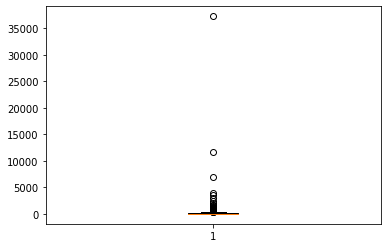

In [32]:
# applying box plot to find aoulier.
plt.boxplot(df['New_Cases'])

In [ ]:
# Based on the box-plot we have seen some outlier. Those are not good for the further data analysis
# so we need to get rid of those values.

In [35]:
# so lets calculate the Z-Score
from scipy import stats
Z_Score=stats.zscore(df['New_Cases'])
Z_Score

array([-7.91899093e-02, -1.75096335e-01, -1.19122478e-01, -1.76461551e-01,
       -1.76461551e-01, -1.76461551e-01, -9.31833736e-02, -1.49498535e-01,
       -1.68952863e-01, -1.72707207e-01, -1.52570271e-01, -1.76120247e-01,
       -7.57768692e-02,  1.76446792e-01, -1.76461551e-01,  1.41975088e-01,
       -5.08616766e-02, -1.76461551e-01, -1.76461551e-01, -1.75778943e-01,
       -8.26029493e-02, -1.68270255e-01, -1.76120247e-01,  2.17682958e+00,
       -1.76461551e-01, -1.67928951e-01, -1.73389815e-01, -1.76461551e-01,
       -1.76461551e-01, -1.38918111e-01,  6.24237650e-01, -1.71683295e-01,
       -1.76461551e-01, -1.76461551e-01,  2.32079345e-01, -1.76120247e-01,
        1.12556527e-02, -1.76461551e-01, -1.56324615e-01, -1.65198519e-01,
       -1.73389815e-01, -1.73389815e-01, -1.70659383e-01, -1.75437639e-01,
       -1.58372439e-01, -1.66222431e-01, -1.47792015e-01, -1.70659383e-01,
       -1.76461551e-01, -7.85073012e-02, -1.76461551e-01, -5.83703648e-02,
       -1.52911575e-01, -

In [38]:
# Creating dataFrame pandas
df_original=pd.DataFrame(df['New_Cases'])
df_original

,New_Cases
0,285
1,4
2,168
3,0
4,0
...,...
180,0
181,0
182,5
183,0


In [44]:
# Finding first and third quartiles
q1,q3=np.percentile(Z_Score,[25,75])
q1,q3

(-0.176461551371234, -0.12151160618004325)

In [48]:
# finding IQR
iqr=q3-q1
iqr

0.05494994519119076

In [50]:
# finding the range of the data or upper bound and lower bound of the data
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
lower_bound,upper_bound

(-0.25888646915802016, -0.039086688393257116)

In [52]:
# finding outlier and assigning value after outlier
actual_data=df_original[(Z_Score<--0.039086688393257116)]
actual_data

,New_Cases
0,285
1,4
2,168
3,0
4,0
...,...
180,0
181,0
182,5
183,0


In [ ]:
# Now, we have eleminated some outlier and made our data more clean and actual for futher analysis.

In [56]:
# checking the duplicat values
duplicate_value=actual_data.duplicated()
duplicate_value.sum()

95

In [60]:
# Hence, we have 95 duplicate value so we need to keep only one and dropping rest of them.
after_drop_duplicate=actual_data.drop_duplicates(keep="first")
after_drop_duplicate.shape

(69, 1)

In [62]:
# dropping last duplicate
after_drop_duplicate_keep_last=actual_data.drop_duplicates(keep='last')
after_drop_duplicate_keep_last.shape

(69, 1)

In [64]:
# dropping all the duplicates
after_drop_duplicate_all=actual_data.drop_duplicates(keep=False)
after_drop_duplicate_all.shape

(46, 1)

In [ ]:
# Now, there is no duplicate values in the dataset

In [66]:
# Lets apply fuzzy string matching to querry
check_data=df['Country_Name']
check_data

0         Afghanistan
1             Albania
2             Algeria
3             Andorra
4              Angola
            ...      
180          Viet Nam
181    Western Sahara
182             Yemen
183            Zambia
184          Zimbabwe
Name: Country_Name, Length: 185, dtype: object

In [67]:
# importing required package for fuzzy string matching.
from fuzzywuzzy import process

In [68]:
# defining the function for querry
def get_matches(query,choices,limit=6):
    results=process.extract(query,choices,limit=limit)
    return results

In [72]:
# applying the fuzzy string matching
get_matches('a',check_data)

[('Albania', 90, 1),
 ('Algeria', 90, 2),
 ('Andorra', 90, 3),
 ('Angola', 90, 4),
 ('Armenia', 90, 7),
 ('Austria', 90, 9)]

In [80]:
# Hence, we can use this method based on the requirements.
# Note: This is the api data got form this url='https://api.covid19api.com/summary' as API.so data might be different while checking.
# Thanks!!!